In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


### Data Import and Cleansing

In [213]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [214]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [215]:
train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [216]:
train.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [217]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof M

In [218]:
test.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       160
Lot Area             0
Street               0
Alley              821
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         1
Mas Vnr Area         1
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 1      25
BsmtFin SF 1         0
BsmtFin Type 2      25
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical 

In [219]:
test.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [220]:
#Since ID, PID are not features, to be removed.
#SalePrice is present in train dataset. Since it is a target variable, to be removed.

pd_train = train.drop(['Id', 'PID'], axis = 1)
pd_test = test.drop (['Id', 'PID'], axis = 1)

In [221]:
#Check is columns in pd_train are the same as pd_test
list(pd_test.columns) == list(pd_train.drop('SalePrice', axis=1).columns)


True

In [222]:
# check percentage of null values in train dataset by column

pd_train.isnull().mean().sort_values(ascending=False)

Pool QC            0.995612
Misc Feature       0.968308
Alley              0.931741
Fence              0.804973
Fireplace Qu       0.487567
Lot Frontage       0.160897
Garage Qual        0.055583
Garage Cond        0.055583
Garage Yr Blt      0.055583
Garage Finish      0.055583
Garage Type        0.055095
Bsmt Exposure      0.028279
BsmtFin Type 2     0.027304
Bsmt Qual          0.026816
BsmtFin Type 1     0.026816
Bsmt Cond          0.026816
Mas Vnr Type       0.010726
Mas Vnr Area       0.010726
Bsmt Half Bath     0.000975
Bsmt Full Bath     0.000975
Bsmt Unf SF        0.000488
Total Bsmt SF      0.000488
BsmtFin SF 1       0.000488
BsmtFin SF 2       0.000488
Garage Cars        0.000488
Garage Area        0.000488
Exterior 2nd       0.000000
Exterior 1st       0.000000
Roof Matl          0.000000
Roof Style         0.000000
Year Remod/Add     0.000000
Exter Qual         0.000000
SalePrice          0.000000
Year Built         0.000000
Lot Config         0.000000
MS Zoning          0

In [223]:
#Remove features with excessively high number of NaN.
pd_train.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], axis = 1, inplace = True)

In [224]:
pd_train.head(5)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,44,0,0,0,0,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,74,0,0,0,0,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,52,0,0,0,0,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,59,0,0,0,0,0,3,2010,WD,138500


In [225]:
# check percentage of null values in test dataset by column

pd_test.isnull().mean().sort_values(ascending=False)

Pool QC            0.995449
Misc Feature       0.953356
Alley              0.934016
Fence              0.804323
Fireplace Qu       0.480091
Lot Frontage       0.182025
Garage Cond        0.051195
Garage Qual        0.051195
Garage Yr Blt      0.051195
Garage Finish      0.051195
Garage Type        0.050057
BsmtFin Type 1     0.028441
BsmtFin Type 2     0.028441
Bsmt Qual          0.028441
Bsmt Cond          0.028441
Bsmt Exposure      0.028441
Electrical         0.001138
Mas Vnr Area       0.001138
Mas Vnr Type       0.001138
Year Built         0.000000
Exter Qual         0.000000
Exter Cond         0.000000
Foundation         0.000000
Exterior 2nd       0.000000
Exterior 1st       0.000000
Roof Matl          0.000000
Roof Style         0.000000
Year Remod/Add     0.000000
Sale Type          0.000000
Overall Cond       0.000000
Overall Qual       0.000000
House Style        0.000000
Bldg Type          0.000000
Condition 2        0.000000
Neighborhood       0.000000
Land Slope         0

In [226]:
#Remove features with excessively high number of NaN.
pd_test.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], axis = 1, inplace = True)

In [227]:
pd_test.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type
0,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,60,112,0,0,0,0,4,2006,WD
1,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,170,0,0,0,0,0,0,8,2006,WD
2,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,100,24,0,0,0,0,0,9,2006,New
3,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,184,0,0,0,0,7,2007,WD
4,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,76,0,0,185,0,0,7,2009,WD


In [228]:
#Remove features with excessively high number of zero values i.e. >1900 zero values
for col in pd_train.columns:
    count_zero = (pd_train[col]==0).value_counts()
    print(col, "\n", count_zero, "\n")

MS SubClass 
 False    2051
Name: MS SubClass, dtype: int64 

MS Zoning 
 False    2051
Name: MS Zoning, dtype: int64 

Lot Frontage 
 False    2051
Name: Lot Frontage, dtype: int64 

Lot Area 
 False    2051
Name: Lot Area, dtype: int64 

Street 
 False    2051
Name: Street, dtype: int64 

Lot Shape 
 False    2051
Name: Lot Shape, dtype: int64 

Land Contour 
 False    2051
Name: Land Contour, dtype: int64 

Utilities 
 False    2051
Name: Utilities, dtype: int64 

Lot Config 
 False    2051
Name: Lot Config, dtype: int64 

Land Slope 
 False    2051
Name: Land Slope, dtype: int64 

Neighborhood 
 False    2051
Name: Neighborhood, dtype: int64 

Condition 1 
 False    2051
Name: Condition 1, dtype: int64 

Condition 2 
 False    2051
Name: Condition 2, dtype: int64 

Bldg Type 
 False    2051
Name: Bldg Type, dtype: int64 

House Style 
 False    2051
Name: House Style, dtype: int64 

Overall Qual 
 False    2051
Name: Overall Qual, dtype: int64 

Overall Cond 
 False    2051
Name: O

In [229]:
pd_train.drop(['Pool Area', 'Misc Val'], axis = 1, inplace = True)

In [230]:
pd_test.drop(['Pool Area', 'Misc Val'], axis = 1, inplace = True)

In [231]:
pd_train.shape

(2051, 72)

In [232]:
pd_test.shape

(879, 71)

In [233]:
#unable to drop all null/Nan value rows/columns because that would mean having no more data. 
#Hence, only dropped columns with excessive amount of Nan values, 
#Convert numeric columns into strings because some features are meant to be categorial.

In [234]:
pd_train.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',


In [235]:
pd_train.dtypes

MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
H

In [236]:
pd_test.dtypes

MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1         int64
BsmtFin Type 2      object
BsmtFin SF 2         int64
Bsmt Unf SF          int64
Total Bsmt SF        int64
H

In [237]:
#Making categorical variables: converting numeric to string type.
pd_train['MS SubClass'] = pd_train['MS SubClass'].astype(str) #type of dwelling
pd_train['Mo Sold'] = pd_train['Mo Sold'].astype(str) #month sold
pd_train['Yr Sold'] = pd_train['Yr Sold'].astype(str) #year sold

pd_test['MS SubClass'] = pd_test['MS SubClass'].astype(str)
pd_test['Mo Sold'] = pd_test['Mo Sold'].astype(str)
pd_test['Yr Sold'] = pd_test['Yr Sold'].astype(str)

In [238]:
#standardize column headers by concatenating names with underscore and making them all lowercase
pd_train.columns = [x.lower().replace(' ','_') for x in pd_train.columns]

In [239]:
pd_test.columns = [x.lower().replace(' ','_') for x in pd_test.columns]

In [240]:
pd_train.head(5)

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,...,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,mo_sold,yr_sold,sale_type,saleprice
0,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,Y,0,44,0,0,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,Y,0,74,0,0,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,0,52,0,0,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,100,0,0,0,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,N,0,59,0,0,0,3,2010,WD,138500


In [241]:
pd_test.head(5)

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,...,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,mo_sold,yr_sold,sale_type
0,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Po,Y,0,60,112,0,0,4,2006,WD
1,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,Y,170,0,0,0,0,8,2006,WD
2,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,Y,100,24,0,0,0,9,2006,New
3,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,N,0,0,184,0,0,7,2007,WD
4,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,76,0,0,185,7,2009,WD


In [242]:
pd_test.shape

(879, 71)

In [243]:
#Identify numeric columns for train dataset and fill null values
features_numeric_train = list(pd_train._get_numeric_data())

In [244]:
pd_train[features_numeric_train] = pd_train[features_numeric_train].fillna(0)

In [245]:
#Identify categorical columns for train dataset and fill null values

features_categorical_train = [x for x in pd_train.columns if (x not in features_numeric_train) and (x != 'SalePrice')]

In [246]:
pd_train[features_categorical_train] = pd_train[features_categorical_train].fillna('null')

In [247]:
pd_train.isnull().sum()

ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
lot_shape          0
land_contour       0
utilities          0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
foundation         0
bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
heating            0
heating_qc         0
central_air        0
electrical         0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
bsmt_full_bath     0
bsmt_half_bath     0
full_bath    

In [248]:
#Identify numeric columns for test dataset and fill null values
features_numeric_test = list(pd_test._get_numeric_data())

In [249]:
pd_test[features_numeric_test] = pd_test[features_numeric_test].fillna(0)

In [250]:
#Identify categorical columns for test dataset and fill null values

features_categorical_test = [x for x in pd_test.columns if (x not in features_numeric_test)]

In [251]:
pd_test[features_categorical_test] = pd_test[features_categorical_test].fillna('null')

In [252]:
pd_test.isnull().sum()

ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
lot_shape          0
land_contour       0
utilities          0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
foundation         0
bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
heating            0
heating_qc         0
central_air        0
electrical         0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
bsmt_full_bath     0
bsmt_half_bath     0
full_bath    

### Exploratory Data Analysis (EDA) and Data Visualisation

Text(0.5,1,'Ames Housing Heatmap')

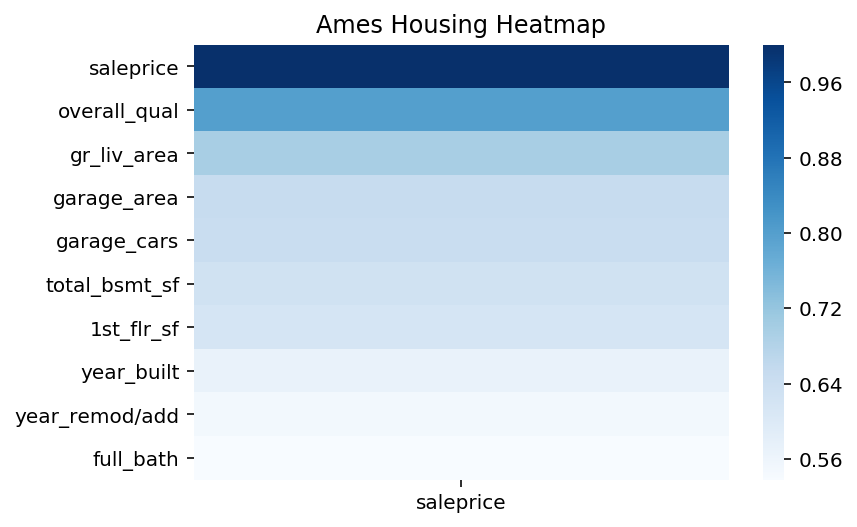

In [253]:
#plot heatmap to visualize the correlation between variables

top_corr = np.abs(pd_train.corr()[['saleprice']]).sort_values('saleprice', ascending=False)
ax = sns.heatmap(top_corr.head(10), cmap='Blues')
ax.set_title('Ames Housing Heatmap')

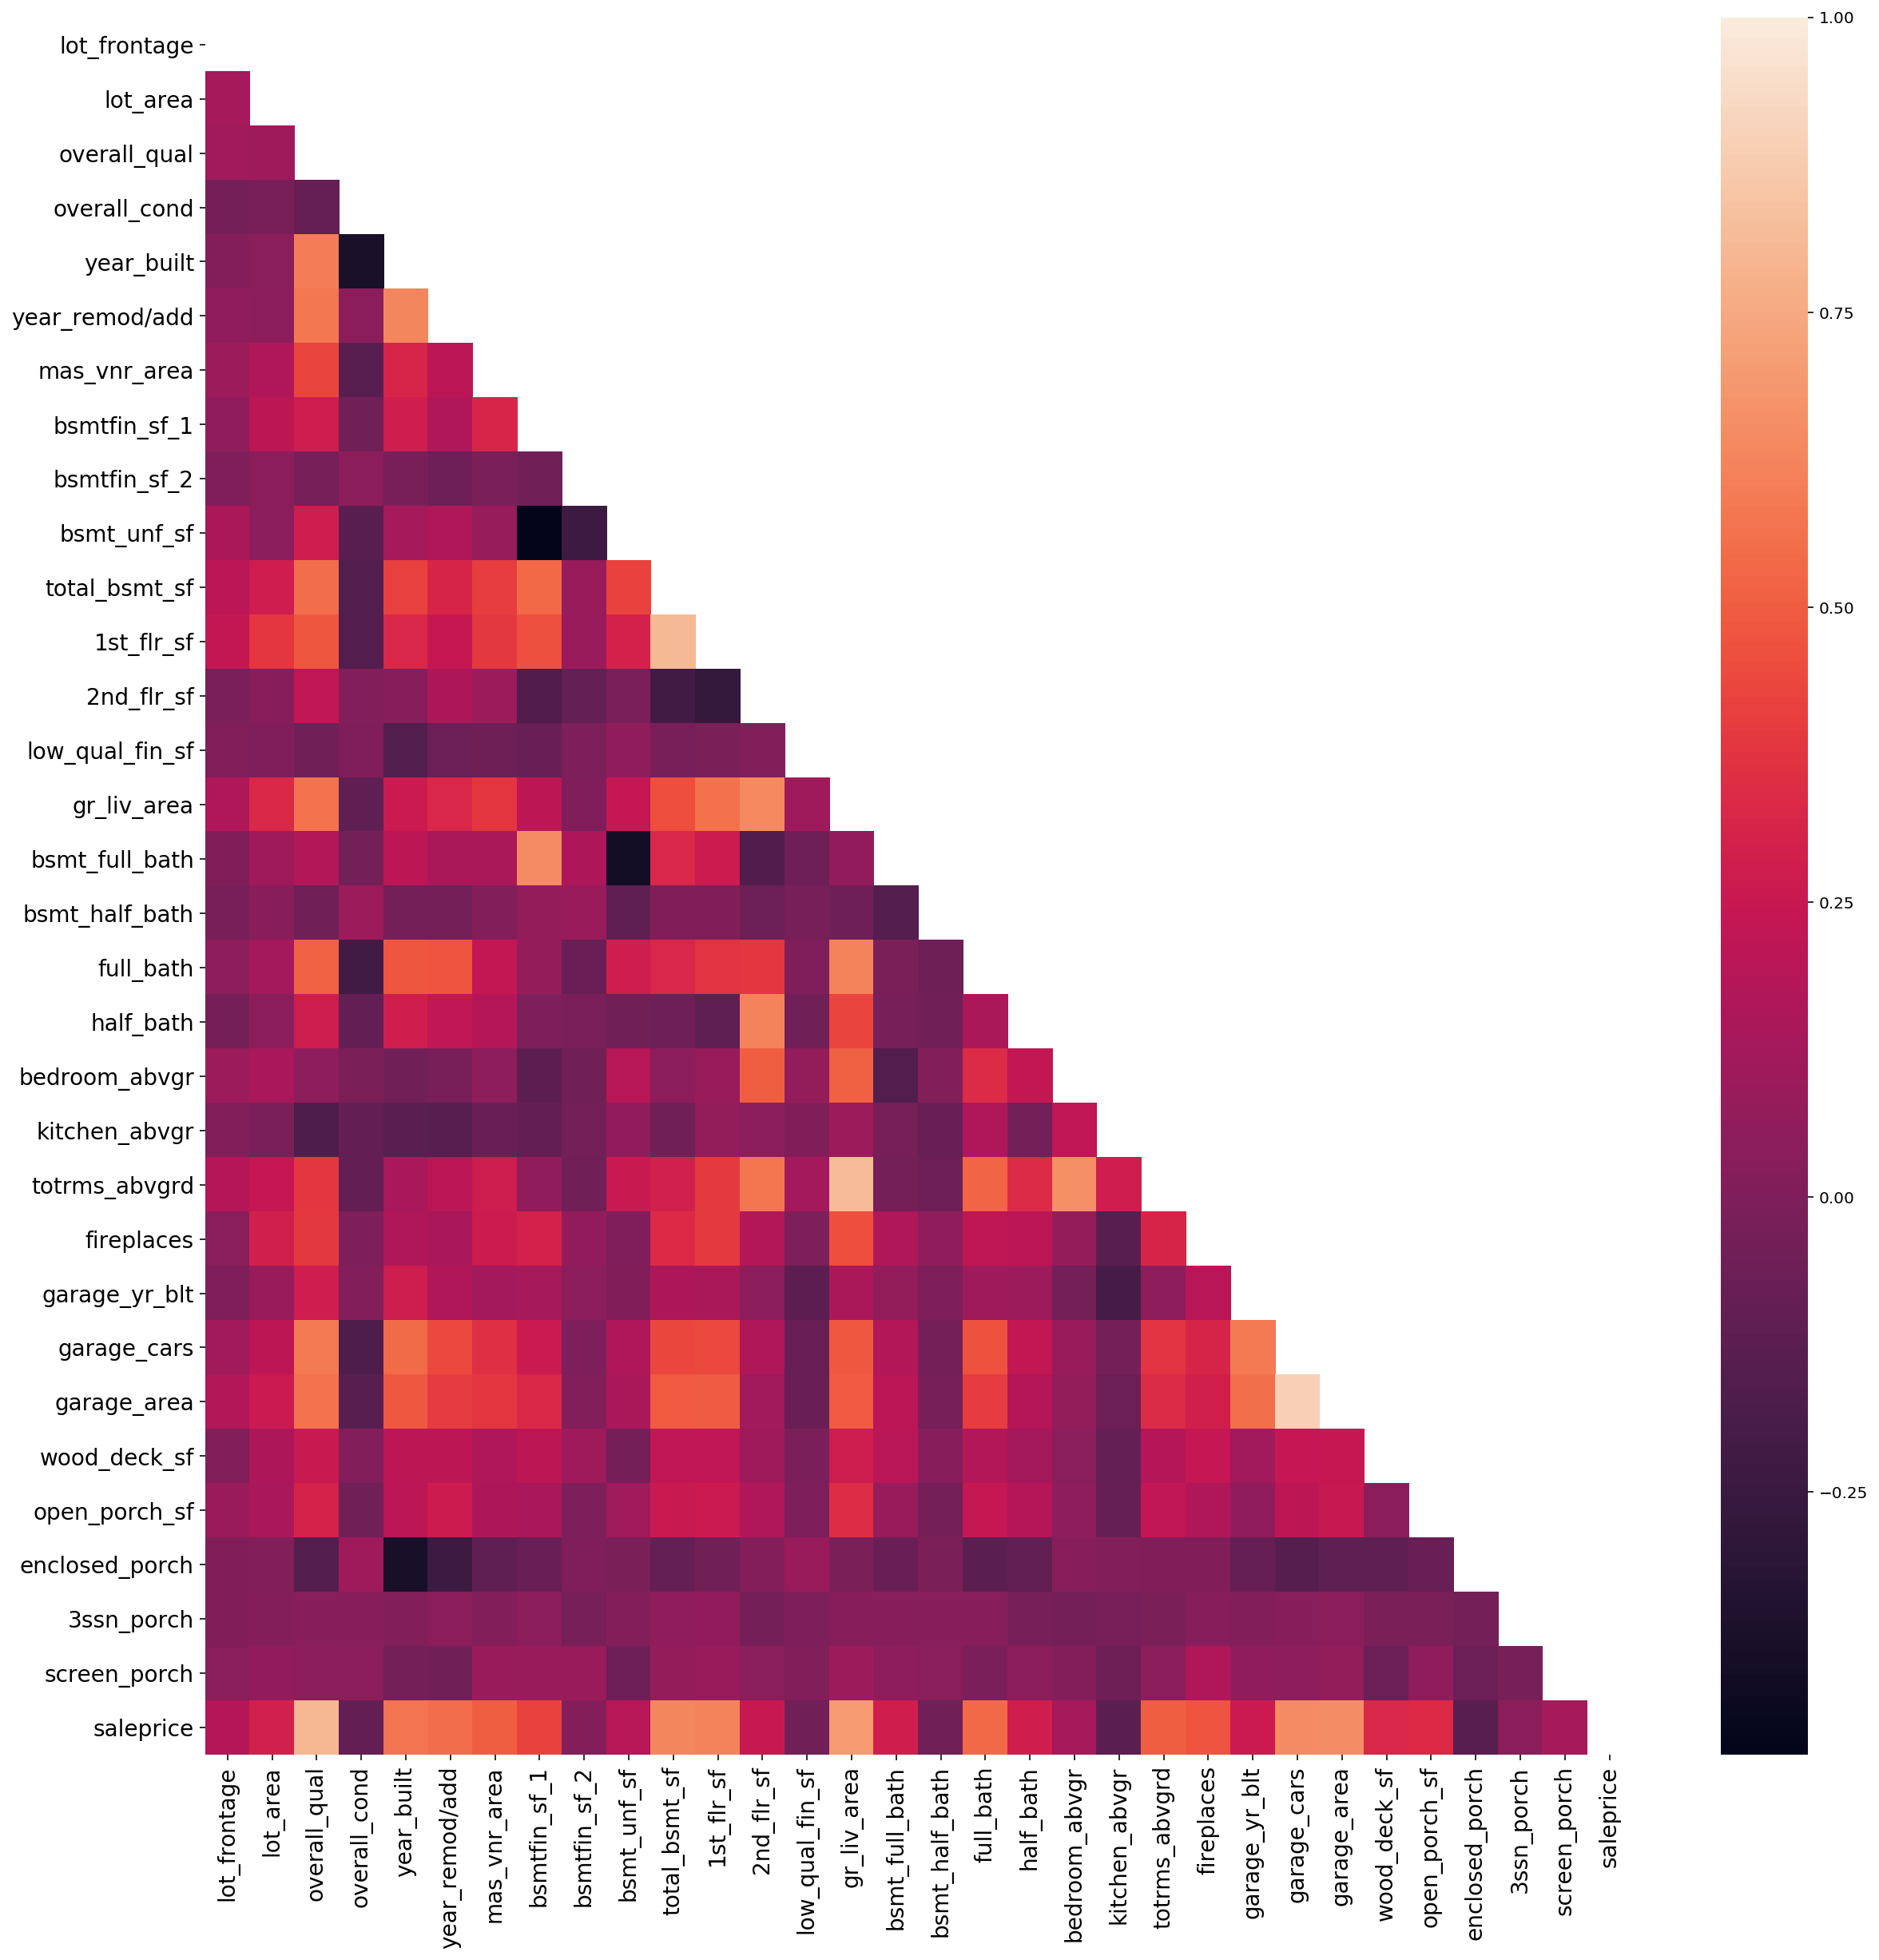

In [254]:
fix, ax = plt.subplots(figsize=(20,20))
train_corr = pd_train.corr()

# Generate a mask for the upper triangle 
mask = np.zeros_like(train_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(train_corr, mask=mask, ax=ax)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show()

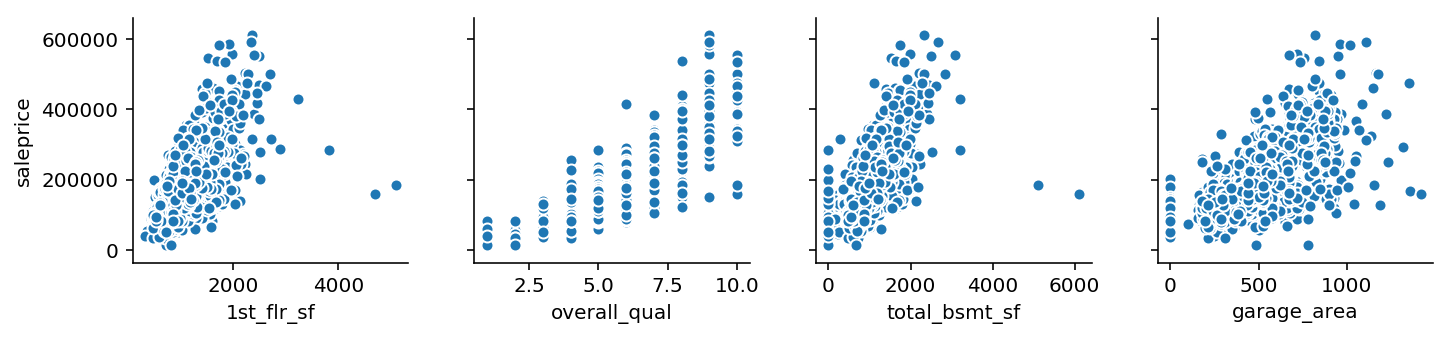

In [255]:
#pairplot
sns.pairplot(pd_train, y_vars = 'saleprice', x_vars = ['1st_flr_sf', 'overall_qual', 'total_bsmt_sf', 'garage_area'])

In [256]:
features_categorical_train

['ms_subclass',
 'ms_zoning',
 'street',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'heating',
 'heating_qc',
 'central_air',
 'electrical',
 'kitchen_qual',
 'functional',
 'garage_type',
 'garage_finish',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 'mo_sold',
 'yr_sold',
 'sale_type']

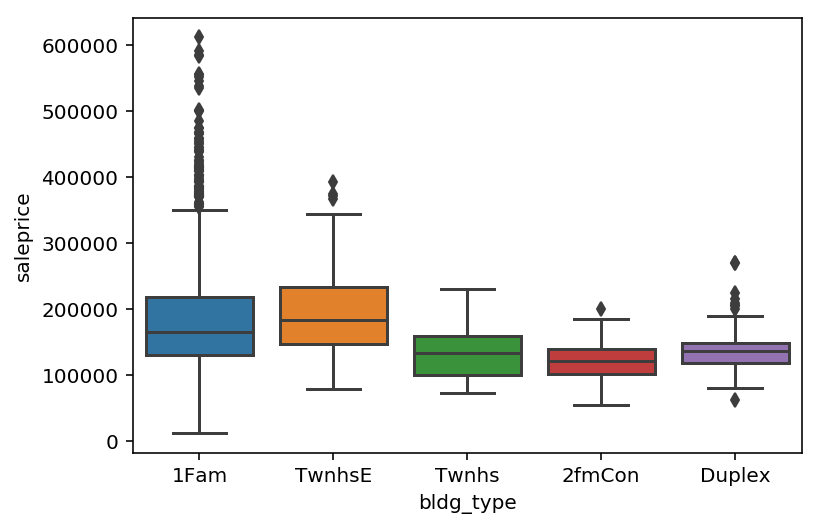

In [257]:
#Finding out interesting categorical variables with boxplot.
#Identifies the building type involved in the sale and the corresponding sale price
#Townhouse End Unit has the highest mean sales price.
sns.boxplot(x='bldg_type', y="saleprice", data=pd_train)

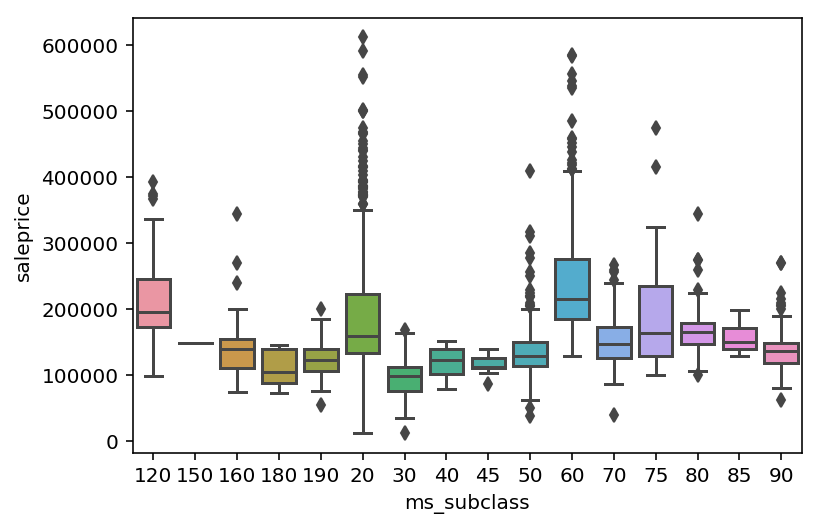

In [258]:
#Identifies the type of dwelling involved in the sale and the corresponding sale price
#1-STORY PUD has the highest mean sales price.
sns.boxplot(x='ms_subclass', y="saleprice", data=pd_train)

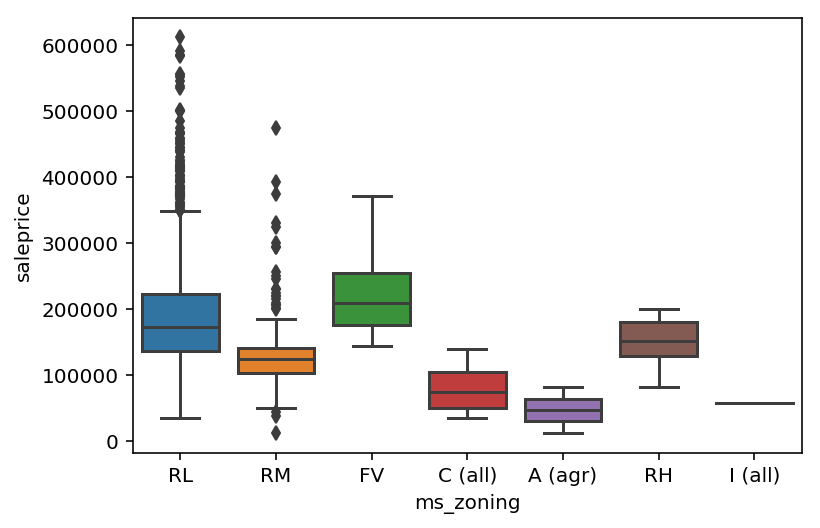

In [259]:
#Identifies the general zoning classification of the sale and the corresponding sale price
sns.boxplot(x='ms_zoning', y="saleprice", data=pd_train)

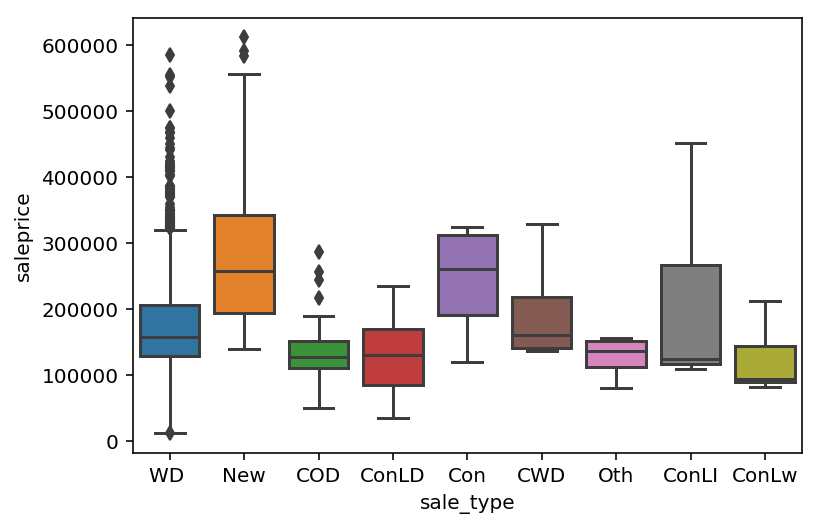

In [260]:
#Identifies the sale type and the corresponding sale price
#Residential Low Density has the highest mean sales price.
sns.boxplot(x='sale_type', y="saleprice", data=pd_train)

### Feature Engineering: Interaction terms 

In [261]:
#I observed that the house is broken down into total basement sq ft, 1st flr ft and 2nd flr ft, 
#which are correlated and can be combined into a single column

pd_train['total_sf'] = pd_train['total_bsmt_sf'] * pd_train['1st_flr_sf'] * pd_train['2nd_flr_sf']
pd_test['total_sf'] = pd_test['total_bsmt_sf'] * pd_test['1st_flr_sf'] * pd_test['2nd_flr_sf']

In [262]:
#I observed that half bath and full bath could essentially be combined into a single column
pd_train['total_bath'] = pd_train['bsmt_full_bath'] * pd_train['bsmt_half_bath'] * pd_train['full_bath'] * pd_train['half_bath']   
pd_test['total_bath'] = pd_test['bsmt_full_bath'] * pd_test['bsmt_half_bath'] * pd_test['full_bath'] * pd_test['half_bath']  

In [263]:
#I observed that there are many features speaking of garage, which could be combined into an interaction term.
pd_train['garage_info'] = pd_train['garage_yr_blt'] * pd_train['garage_cars'] * pd_train['garage_area']
pd_test['garage_info'] = pd_test['garage_yr_blt'] * pd_test['garage_cars'] * pd_test['garage_area']

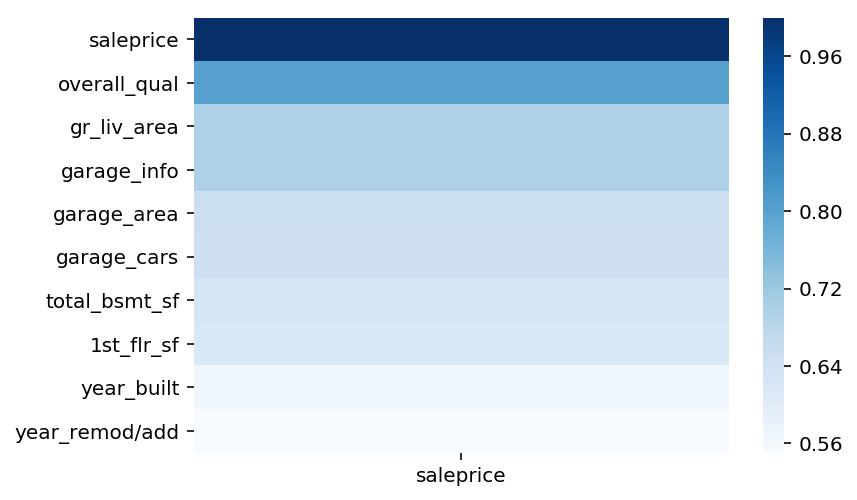

In [264]:
#from heatmap, we can tell that overall_qual has highest correlation with sale price.
top_corr = np.abs(pd_train.corr()[['saleprice']]).sort_values('saleprice', ascending=False)
sns.heatmap(top_corr.head(10), cmap='Blues')

### Feature Selection: Chi-Square Test (Categorical Variables)

In [265]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [266]:
#I want to discard categorical variables which exhibit dependency. Only keep those which are independent 
#Null hypothesis is the categorical variables are independent of each other. Hence if p>alpha, we accept the null hypothesis.

In [267]:
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p>alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT IMPORTANT for Prediction. (Discard {0} from model)".format(colX)
        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        


#Initialize ChiSquare Class
cT = ChiSquare(pd_train)

#Feature Selection
testColumns = features_categorical_train
for i in range(len(testColumns)):
        for j in range(i+1, len(testColumns)):
            cT.TestIndependence(testColumns[i],testColumns[j])
        cT._print_chisquare_result(testColumns[i],alpha=0.05)

ms_subclass is NOT IMPORTANT for Prediction. (Discard ms_subclass from model)
ms_zoning is NOT IMPORTANT for Prediction. (Discard ms_zoning from model)
street is NOT IMPORTANT for Prediction. (Discard street from model)
lot_shape is IMPORTANT for Prediction
land_contour is NOT IMPORTANT for Prediction. (Discard land_contour from model)
utilities is NOT IMPORTANT for Prediction. (Discard utilities from model)
lot_config is IMPORTANT for Prediction
land_slope is IMPORTANT for Prediction
neighborhood is NOT IMPORTANT for Prediction. (Discard neighborhood from model)
condition_1 is NOT IMPORTANT for Prediction. (Discard condition_1 from model)
condition_2 is IMPORTANT for Prediction
bldg_type is NOT IMPORTANT for Prediction. (Discard bldg_type from model)
house_style is NOT IMPORTANT for Prediction. (Discard house_style from model)
roof_style is IMPORTANT for Prediction
roof_matl is IMPORTANT for Prediction
exterior_1st is NOT IMPORTANT for Prediction. (Discard exterior_1st from model)
ext

In [268]:
pd_train.shape

(2051, 75)

In [269]:
pd_test.shape

(879, 74)

In [270]:
selected_categorical_train = ['lot_shape', 'lot_config', 'land_slope', 'condition_2', 'roof_style',
                                         'roof_matl', 'heating', 'electrical',
                                        'functional', 'garage_qual']

In [271]:
selected_categorical_test = ['lot_shape', 'lot_config', 'land_slope', 'condition_2', 'roof_style',
                                         'roof_matl', 'heating', 'electrical',
                                        'functional', 'garage_qual']

In [272]:
pd_train = pd_train.drop(columns = ['ms_subclass', 'ms_zoning', 'street', 'land_contour', 'utilities', 'neighborhood', 'condition_1', 
                         'bldg_type', 'house_style', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual','exter_cond',
                         'foundation', 'bsmt_qual', 'bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2',
                         'heating_qc', 'central_air','kitchen_qual','garage_type','garage_finish','garage_cond','paved_drive',
                         'mo_sold', 'yr_sold', 'sale_type'], axis = 1)

In [273]:
pd_test = pd_test.drop(columns = ['ms_subclass', 'ms_zoning', 'street', 'land_contour', 'utilities', 'neighborhood', 'condition_1', 
                         'bldg_type', 'house_style', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual','exter_cond',
                         'foundation', 'bsmt_qual', 'bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2',
                         'heating_qc', 'central_air','kitchen_qual','garage_type','garage_finish','garage_cond','paved_drive',
                         'mo_sold', 'yr_sold', 'sale_type'], axis = 1)

### Feature Selection: Heatmap (Numerical Variables)

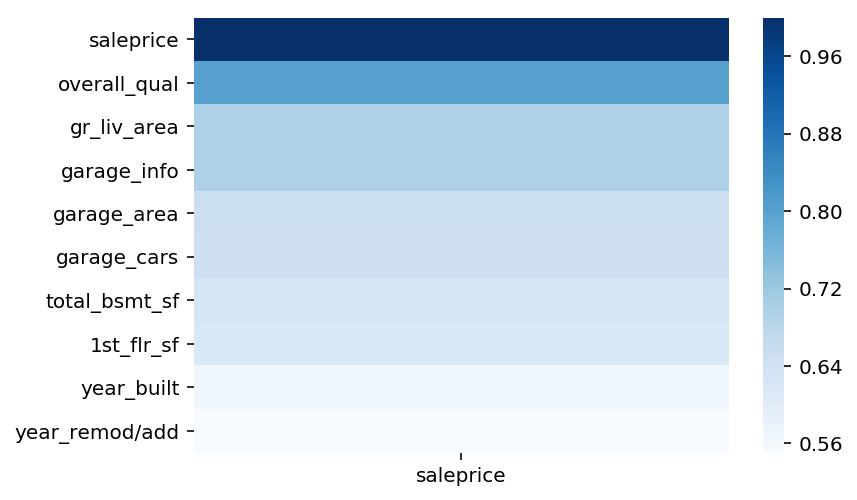

In [274]:
high_corr = np.abs(pd_train.corr()[['saleprice']]).sort_values('saleprice', ascending=False)
sns.heatmap(high_corr.head(10), cmap='Blues')

In [275]:
high_corr.head(10)

,saleprice
saleprice,1.000000
overall_qual,0.800207
gr_liv_area,0.697038
garage_info,0.694782
garage_area,0.649897
garage_cars,0.647781
total_bsmt_sf,0.629303
1st_flr_sf,0.618486
year_built,0.571849
year_remod/add,0.550370


In [276]:
selected_numeric_train = pd_train[['overall_qual', 'gr_liv_area', 'garage_info','garage_area', 
                                   'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 
                                   'year_built', 'year_remod/add']]

In [277]:
type(selected_numeric_train)

pandas.core.frame.DataFrame

In [278]:
selected_numeric_test = pd_test[['overall_qual', 'gr_liv_area', 'garage_info','garage_area', 
                                   'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 
                                   'year_built', 'year_remod/add']]

In [279]:
type(selected_numeric_test)

pandas.core.frame.DataFrame

In [280]:
num_feature = list(pd_train._get_numeric_data())

In [281]:
num_feature

['lot_frontage',
 'lot_area',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'totrms_abvgrd',
 'fireplaces',
 'garage_yr_blt',
 'garage_cars',
 'garage_area',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 '3ssn_porch',
 'screen_porch',
 'saleprice',
 'total_sf',
 'total_bath',
 'garage_info']

In [282]:
pd_train = pd_train.drop(columns = ['lot_frontage',
 'lot_area',
 'overall_cond',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'totrms_abvgrd',
 'fireplaces',
 'garage_yr_blt',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 '3ssn_porch',
 'screen_porch',
 'total_sf',
 'total_bath','full_bath'], axis =1)


In [283]:
pd_test = pd_test.drop(columns = ['lot_frontage',
 'lot_area',
 'overall_cond',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'totrms_abvgrd',
 'fireplaces',
 'garage_yr_blt',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 '3ssn_porch',
 'screen_porch',
 'total_sf',
 'total_bath','full_bath'], axis =1)


### Dummy Variables

In [284]:
pd_train = pd.get_dummies(pd_train, columns=[x for x in selected_categorical_train], drop_first=True)

In [285]:
pd_test = pd.get_dummies(pd_test, columns=[x for x in selected_categorical_test], drop_first=True)

In [286]:
features_train = [x for x in pd_train.columns if x != 'saleprice']

# Find missing columns in test
missing_cols = set(pd_train.columns) - set(pd_test.columns)
# Add a missing column in test with default value equal to 0
for i in missing_cols:
    pd_test[i] = 0
# Ensure the order of columns in test is the same as in train
pd_test = pd_test[features_train]

In [287]:
pd_train.shape #additional one column for saleprice

(2051, 56)

In [288]:
pd_test.shape

(879, 55)

### Create our features matrix (X) and target vector (y)

In [289]:
#X includes the top numeric features obtained from heatmap, suitable categorical features from chi-sq and the dummy variables.

X = pd_train[[x for x in pd_train.columns if x != 'saleprice']]

In [290]:
type(X)

pandas.core.frame.DataFrame

In [291]:
y = pd_train.saleprice.values

In [292]:
X_t = pd_test

### Build a linear regression model and conduct Cross Validation

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size = 0.2)

In [294]:
#Baseline linear Regression Model with the selected features
lm = LinearRegression()
model = lm.fit(X_train,y_train)


In [295]:
predictions  =  model.predict(X_test)
score        =  model.score(X_test, y_test)

In [296]:
score.round(3)

0.847

In [297]:
#Cross Validation
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10) 

In [298]:
print("Cross validation scores: ",scores)
print("\n")
print("Mean score: ",scores.mean().round(3))

Cross validation scores:  [0.82116158 0.8508863  0.8486146  0.8646872  0.63228149 0.85166525
 0.86576373 0.84611709 0.8386329  0.63120433]


Mean score:  0.805


### Scaling

In [299]:
scaler = StandardScaler()
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) 

X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled[:4] #this outputs the first 4 scaled rows across all columns


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-0.081747,1.097701,0.990598,0.656487,0.478981,-0.279707,0.298359,0.048810,-0.016783,-0.158114,...,-0.145501,-0.124418,-0.034943,-0.024701,0.264193,-0.207983,-0.099258,-0.034943,0.353311,-0.245186
1,1.322072,1.130806,1.038255,1.929778,2.000532,0.936761,1.603182,1.925248,2.296601,-0.158114,...,-0.145501,-0.124418,-0.034943,-0.024701,0.264193,-0.207983,-0.099258,-0.034943,0.353311,-0.245186
2,-0.081747,0.170771,-0.343799,0.404919,0.474033,-0.283663,0.298359,0.249693,0.081836,-0.158114,...,-0.145501,-0.124418,-0.034943,-0.024701,0.264193,-0.207983,-0.099258,-0.034943,0.353311,-0.245186
3,1.322072,0.865969,0.656999,0.177624,0.001486,1.510380,0.298359,-0.243385,-0.193057,-0.158114,...,-0.145501,-0.124418,-0.034943,-0.024701,0.264193,-0.207983,-0.099258,-0.034943,0.353311,-0.245186


In [300]:
X_test_scaled = scaler.transform(X_test) 
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled[:4] #this outputs the first 4 scaled rows across all columns

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-0.783656,0.137667,-0.391456,-0.329927,-0.520542,-1.078817,0.298359,0.468839,0.208502,-0.158114,...,-0.145501,-0.124418,-0.034943,-0.024701,0.264193,-0.207983,-0.099258,-0.034943,0.353311,-0.245186
1,0.620163,-0.193379,-0.868026,-0.301239,0.127663,1.300712,0.298359,0.062506,-0.034212,-0.158114,...,-0.145501,-0.124418,-0.034943,-0.024701,0.264193,-0.207983,-0.099258,-0.034943,0.353311,-0.245186
2,1.322072,1.163910,1.085912,-0.248277,-0.535387,1.164231,1.603182,0.834083,1.332151,-0.158114,...,-0.145501,-0.124418,-0.034943,-0.024701,0.264193,-0.207983,-0.099258,-0.034943,0.353311,-0.245186
3,-0.081747,-1.881715,-1.630538,-0.561635,-0.800112,0.291934,-1.006464,-1.174756,-1.041522,-0.158114,...,-0.145501,-0.124418,-0.034943,-0.024701,0.264193,-0.207983,-0.099258,-0.034943,0.353311,-0.245186


In [301]:
#naming the columns for train data

X_train_scaled.columns = X.columns

In [302]:
X_train_scaled.head(5)

,overall_qual,year_built,year_remod/add,total_bsmt_sf,1st_flr_sf,gr_liv_area,garage_cars,garage_area,garage_info,lot_shape_IR2,...,functional_Min2,functional_Mod,functional_Sal,functional_Sev,functional_Typ,garage_qual_Fa,garage_qual_Gd,garage_qual_Po,garage_qual_TA,garage_qual_null
0,-0.081747,1.097701,0.990598,0.656487,0.478981,-0.279707,0.298359,0.048810,-0.016783,-0.158114,...,-0.145501,-0.124418,-0.034943,-0.024701,0.264193,-0.207983,-0.099258,-0.034943,0.353311,-0.245186
1,1.322072,1.130806,1.038255,1.929778,2.000532,0.936761,1.603182,1.925248,2.296601,-0.158114,...,-0.145501,-0.124418,-0.034943,-0.024701,0.264193,-0.207983,-0.099258,-0.034943,0.353311,-0.245186
2,-0.081747,0.170771,-0.343799,0.404919,0.474033,-0.283663,0.298359,0.249693,0.081836,-0.158114,...,-0.145501,-0.124418,-0.034943,-0.024701,0.264193,-0.207983,-0.099258,-0.034943,0.353311,-0.245186
3,1.322072,0.865969,0.656999,0.177624,0.001486,1.510380,0.298359,-0.243385,-0.193057,-0.158114,...,-0.145501,-0.124418,-0.034943,-0.024701,0.264193,-0.207983,-0.099258,-0.034943,0.353311,-0.245186
4,-0.081747,0.137667,0.466370,-1.175110,-0.174173,0.703357,0.298359,0.176645,0.038669,-0.158114,...,-0.145501,-0.124418,-0.034943,-0.024701,0.264193,-0.207983,-0.099258,-0.034943,0.353311,-0.245186


In [303]:
#naming the columns for test data

X_test_scaled.columns = X.columns

In [304]:
X_test_scaled.head(5)

,overall_qual,year_built,year_remod/add,total_bsmt_sf,1st_flr_sf,gr_liv_area,garage_cars,garage_area,garage_info,lot_shape_IR2,...,functional_Min2,functional_Mod,functional_Sal,functional_Sev,functional_Typ,garage_qual_Fa,garage_qual_Gd,garage_qual_Po,garage_qual_TA,garage_qual_null
0,-0.783656,0.137667,-0.391456,-0.329927,-0.520542,-1.078817,0.298359,0.468839,0.208502,-0.158114,...,-0.145501,-0.124418,-0.034943,-0.024701,0.264193,-0.207983,-0.099258,-0.034943,0.353311,-0.245186
1,0.620163,-0.193379,-0.868026,-0.301239,0.127663,1.300712,0.298359,0.062506,-0.034212,-0.158114,...,-0.145501,-0.124418,-0.034943,-0.024701,0.264193,-0.207983,-0.099258,-0.034943,0.353311,-0.245186
2,1.322072,1.163910,1.085912,-0.248277,-0.535387,1.164231,1.603182,0.834083,1.332151,-0.158114,...,-0.145501,-0.124418,-0.034943,-0.024701,0.264193,-0.207983,-0.099258,-0.034943,0.353311,-0.245186
3,-0.081747,-1.881715,-1.630538,-0.561635,-0.800112,0.291934,-1.006464,-1.174756,-1.041522,-0.158114,...,-0.145501,-0.124418,-0.034943,-0.024701,0.264193,-0.207983,-0.099258,-0.034943,0.353311,-0.245186
4,0.620163,1.130806,1.038255,-0.462332,-0.775371,0.469954,0.298359,0.477971,0.237096,-0.158114,...,-0.145501,-0.124418,-0.034943,-0.024701,0.264193,-0.207983,-0.099258,-0.034943,0.353311,-0.245186


In [305]:
#Scaling original test dataset
test_sc = scaler.transform(X_t) 

### Regularization: Lasso Model

In [306]:
from sklearn.linear_model import Lasso, LassoCV

In [307]:
#find optimal alpha value
lasso_model = LassoCV(n_alphas=100, cv=10).fit(X_train_scaled,y_train)

lasso_alpha_optimal = lasso_model.alpha_
print('Optimal alpha = ',lasso_alpha_optimal)

Optimal alpha =  1366.8729864873567


In [308]:
#cross validate with optimal alpha
lasso_model = Lasso(alpha=lasso_alpha_optimal)

cv_score_lasso = cross_val_score(lasso_model, X_train_scaled, y_train, cv=10, scoring='r2').mean()
print(cv_score_lasso.round(3))

cv_score_lasso_test = cross_val_score(lasso_model, X_test_scaled, y_test, cv=10, scoring='r2').mean()
print(cv_score_lasso_test.round(3))

0.783
0.815


### Regularization: Ridge Model

In [309]:
from sklearn.linear_model import Ridge, RidgeCV

In [310]:
#find optimal alpha value
r_alphas = np.logspace(0, 5, 200)
ridge_model = RidgeCV(alphas=r_alphas, store_cv_values=True)
ridge_model = ridge_model.fit(X_train_scaled, y_train)

In [311]:
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha.round(3)

86.035

In [312]:
ridge_opt = Ridge(alpha=ridge_optimal_alpha)
cv_score = cross_val_score(ridge_opt, X_train_scaled, y_train, cv=10, scoring='r2').mean()
print(cv_score.round(3))

cv_score_test = cross_val_score(ridge_opt, X_test_scaled, y_test, cv=10, scoring='r2').mean()
print(cv_score_test.round(3))


0.782
0.811


Conclusion: Use Lasso Regression Model as it improves the cross-validated score.

### Prediction of target variable

In [313]:
from sklearn import metrics


In [314]:
#New dataframe with columns ID and saleprice

In [315]:
pd_train.shape

(2051, 56)

In [316]:
train.shape

(2051, 81)

In [317]:
test.shape

(879, 80)

In [318]:
test_sc.shape

(879, 55)

In [319]:
X_train_scaled.shape

(1640, 55)

In [320]:
lasso_model = lasso_model.fit(X_train_scaled, y_train)
y_predict  =  lasso_model.predict(test_sc)

In [321]:
y_predict.shape

(879,)

In [322]:
submission = pd.DataFrame(y_predict, columns=['SalePrice'])
submission['Id'] = test['Id']
submission = submission[['Id', 'SalePrice']]

In [323]:
len(test['Id'])

879

In [324]:
len(submission['Id'])

879

In [325]:
predictions

array([127628.22520797, 207051.22445021, 278808.09326992, 144729.96051941,
       218405.41608311, 330857.76203577, 170850.70395276, 265887.75417249,
       162061.8743155 , 123409.61140918, 146027.31586715, 219935.02685117,
       181918.88373059, 112689.10170838, 125757.54223363,  99968.62812522,
       120839.76880242, 212389.18801931, 333172.66420342, 220819.41162683,
       213773.46432185, 210391.96581107, 184029.79571321, 110299.51980064,
       149288.42729766, 283255.66955198, 166303.44688542, 124962.00631623,
       259730.06857561, 104524.73267648, 298594.84766764, 112587.09838614,
       125096.48576943, 188847.0070251 , 216750.72082176,  88708.67278737,
       162591.88885786, 221180.13400129, 320917.9387296 , 120999.2839047 ,
       218584.22891972, 220743.58468753, 323847.92311054, 177867.32632761,
        96409.01593159, 164969.73141755, 116103.96656604, 109860.16200506,
       305839.7407394 , 162974.35143028, 341514.66730384,  54860.2428281 ,
       150441.71635964, 1

In [326]:
submission.head()

,Id,SalePrice
0,2658,148006.978722
1,2718,194634.183135
2,2414,190938.058257
3,1989,117556.390906
4,625,166341.667217


In [327]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions)) #root mean squared error

In [328]:
RMSE

30131.62653979677

In [329]:
submission.to_csv('submission_21Nov_final', index=False)

In [330]:
#Data Dictionary for README
pd.options.display.max_rows = 200
train.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B